In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
tpi_grid = pandas.read_csv('https://psl.noaa.gov/data/timeseries/IPOTPI/tpi.timeseries.ersstv5.filt.data',
                           header=None, skiprows=1, skipfooter=11, sep='\s+',
                           index_col=0,
                           na_values=['-99.000'],
                           engine='python')

tpi = tpi_grid.stack(dropna=False)
times = pandas.date_range('18540101', freq='MS', periods=tpi.size)
tpi.index = times
tpi_xr=tpi.to_xarray()
tpi_xr=tpi_xr.rename({'index':'time'})
tpi=tpi_xr.sel(time=slice('1860-07','2015-01'))
ds=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/rr_monthly_0.25.1900-2015.nc')
rr=ds.rr
land_sea_ds = xr.open_dataset('/g/data/eg3/pfd548/gridarea/land-sea_mask/fractional_land.1.5-deg.nc')
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/fx/atmos/fx/r0i0p0/latest/sftlf/sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
landfrac = xr.open_dataset(url).sftlf
nw_area=rr.sel(lat=slice(-26,-10),lon=slice(112,138))
ne_area=rr.sel(lat=slice(-26,-10),lon=slice(138,156))
nw_land=nw_area.where(landfrac>0)
ne_land=ne_area.where(landfrac>0)
nw_climate=nw_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
ne_climate=ne_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
nw_anomaly=(nw_land.groupby('time.month')-nw_climate).mean(dim=['lon','lat'])
ne_anomaly=(ne_land.groupby('time.month')-ne_climate).mean(dim=['lon','lat'])
tpi_modern=tpi.sel(time=slice('1900','2014'))
nw_modern=nw_anomaly.sel(time=slice('1900','2014'))
ne_modern=ne_anomaly.sel(time=slice('1900','2014'))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/core/indexing.py:572: SerializationWarning: Unable to decode time axis into 

In [2]:
tpi_modern

<xarray.DataArray (time: 1380)>
array([ 0.312,  0.32 ,  0.328, ..., -0.084, -0.078, -0.072])
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2014-12-01

In [3]:
tpi_DJF=tpi_modern.groupby('time.season')['DJF']
tpi_summer=tpi_DJF.resample(time='AS-DEC').mean()
tpi_SON=tpi_modern.groupby('time.season')['SON']
tpi_spring=tpi_SON.resample(time='AS-SEP').mean()
tpi_MAM=tpi_modern.groupby('time.season')['MAM']
tpi_autumn=tpi_MAM.resample(time='AS-MAR').mean()

tpi_summer

In [5]:
tpi_spring

<xarray.DataArray (time: 115)>
array([ 3.83000000e-01,  4.62000000e-01,  5.16000000e-01,  5.27666667e-01,
        4.76666667e-01,  3.59333333e-01,  1.98333333e-01,  2.53333333e-02,
       -1.12666667e-01, -1.71666667e-01, -1.45000000e-01, -6.70000000e-02,
       -4.00000000e-03, -2.33333333e-03, -6.53333333e-02, -1.66000000e-01,
       -2.60666667e-01, -3.11000000e-01, -3.06000000e-01, -2.73333333e-01,
       -2.37666667e-01, -2.14000000e-01, -2.02000000e-01, -1.82333333e-01,
       -1.35666667e-01, -5.46666667e-02,  4.36666667e-02,  1.38000000e-01,
        2.05000000e-01,  2.30000000e-01,  2.08666667e-01,  1.50666667e-01,
        7.53333333e-02, -7.00000000e-03, -7.56666667e-02, -1.00333333e-01,
       -6.20000000e-02,  2.40000000e-02,  1.17000000e-01,  1.78000000e-01,
        1.78000000e-01,  1.13000000e-01,  3.33333333e-04, -1.29666667e-01,
       -2.47666667e-01, -3.38666667e-01, -3.97666667e-01, -4.37000000e-01,
       -4.66000000e-01, -4.85000000e-01, -4.91333333e-01, -4.94666667e-01,
       -4.96666667e-01, -4.90666667e-01, -4.67000000e-01, -4.17000000e-01,
       -3.42000000e-01, -2.57000000e-01, -1.87333333e-01, -1.58333333e-01,
       -1.66000000e-01, -1.88000000e-01, -1.98000000e-01, -1.78000000e-01,
       -1.29666667e-01, -8.43333333e-02, -7.06666667e-02, -9.20000000e-02,
       -1.46333333e-01, -2.25333333e-01, -3.21666667e-01, -4.18666667e-01,
       -4.90666667e-01, -5.19000000e-01, -4.88000000e-01, -3.95666667e-01,
       -2.63000000e-01, -1.11000000e-01,  4.53333333e-02,  1.78666667e-01,
        2.63000000e-01,  3.01000000e-01,  3.10000000e-01,  2.95666667e-01,
        2.55000000e-01,  1.93000000e-01,  1.28000000e-01,  8.23333333e-02,
        7.80000000e-02,  1.22333333e-01,  1.99000000e-01,  2.84000000e-01,
        3.62666667e-01,  4.08333333e-01,  3.88666667e-01,  2.93000000e-01,
        1.43000000e-01, -2.53333333e-02, -1.72666667e-01, -2.68000000e-01,
       -2.96333333e-01, -2.61000000e-01, -1.92000000e-01, -1.30000000e-01,
       -1.04333333e-01, -1.37000000e-01, -2.17000000e-01, -3.14666667e-01,
       -4.05333333e-01, -4.65000000e-01, -4.71000000e-01, -4.14000000e-01,
       -3.09000000e-01, -1.86000000e-01, -8.43333333e-02])
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2014-09-01

In [6]:
tpi_autumn

<xarray.DataArray (time: 115)>
array([ 0.33633333,  0.42533333,  0.49333333,  0.52833333,  0.51066667,
        0.425     ,  0.28266667,  0.11066667, -0.051     , -0.15333333,
       -0.168     , -0.10833333, -0.02933333,  0.006     , -0.027     ,
       -0.11333333, -0.217     , -0.293     , -0.31466667, -0.29133333,
       -0.255     , -0.224     , -0.207     , -0.19433333, -0.163     ,
       -0.09866667, -0.00633333,  0.093     ,  0.176     ,  0.224     ,
        0.225     ,  0.183     ,  0.11433333,  0.034     , -0.045     ,
       -0.095     , -0.089     , -0.023     ,  0.072     ,  0.15366667,
        0.18633333,  0.15333333,  0.06066667, -0.065     , -0.191     ,
       -0.29733333, -0.371     , -0.419     , -0.45266667, -0.47666667,
       -0.48866667, -0.493     , -0.496     , -0.49533333, -0.482     ,
       -0.446     , -0.38166667, -0.29933333, -0.21866667, -0.16733333,
       -0.159     , -0.177     , -0.196     , -0.19233333, -0.15566667,
       -0.10433333, -0.073     , -0.077     , -0.11533333, -0.18333333,
       -0.272     , -0.372     , -0.459     , -0.51133333, -0.51166667,
       -0.44866667, -0.33266667, -0.18833333, -0.032     ,  0.11666667,
        0.227     ,  0.287     ,  0.30833333,  0.306     ,  0.27866667,
        0.226     ,  0.15933333,  0.101     ,  0.07433333,  0.09433333,
        0.15833333,  0.24133333,  0.32533333,  0.392     ,  0.40766667,
        0.34933333,  0.22266667,  0.059     , -0.10366667, -0.228     ,
       -0.29066667, -0.28566667, -0.22866667, -0.15833333, -0.111     ,
       -0.11333333, -0.173     , -0.265     , -0.36233333, -0.44033333,
       -0.47566667, -0.45      , -0.36566667, -0.24733333, -0.13      ])
Coordinates:
  * time     (time) datetime64[ns] 1900-03-01 1901-03-01 ... 2014-03-01

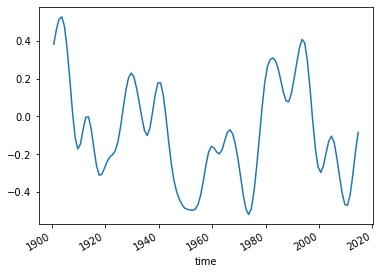

In [7]:
tpi_spring.plot()

In [8]:
tpi_summer_positive=tpi_summer.where(tpi_summer>0)

In [9]:
tpi_summer_positive

<xarray.DataArray (time: 116)>
array([0.316     , 0.405     , 0.47866667, 0.524     , 0.521     ,
       0.45266667, 0.322     , 0.15466667,        nan,        nan,
              nan,        nan,        nan, 0.00333333,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.06833333, 0.15766667, 0.216     ,
       0.229     , 0.197     , 0.133     , 0.055     ,        nan,
              nan,        nan,        nan, 0.048     , 0.13666667,
       0.18433333, 0.16766667, 0.088     ,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.082     ,
       0.20466667, 0.276     , 0.30566667, 0.30866667, 0.288     ,
       0.241     , 0.176     , 0.11366667, 0.07666667, 0.08433333,
       0.13933333, 0.22      , 0.305     , 0.37866667, 0.41033333,
       0.37133333, 0.25966667, 0.101     ,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan])
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01

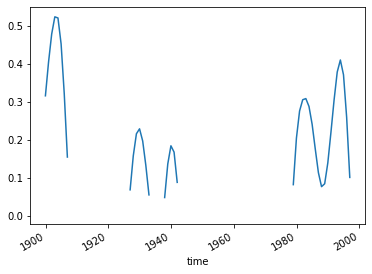

In [10]:
tpi_summer_positive.plot()

In [11]:
tpi_summer.sel(tpi_summer>0)

ValueError: the first argument to .sel must be a dictionary

In [12]:
ds2=xr.open_dataset('/home/563/lx7831/ncfile/sst.mnmean.nc')
sst=ds2.sst
nino3_area=sst.sel(lat=slice(5,-5),lon=slice(210,270))
nino34_area=sst.sel(lat=slice(5,-5),lon=slice(190,240))
nino4_area=sst.sel(lat=slice(5,-5),lon=slice(160,210))
nino3_climate=nino3_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino34_climate=nino34_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino4_climate=nino4_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino3_anomaly=(nino3_area.groupby('time.month')-nino3_climate).mean(dim='lat').mean(dim='lon')
nino34_anomaly=(nino34_area.groupby('time.month')-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area.groupby('time.month')-nino4_climate).mean(dim='lat').mean(dim='lon')
alpha=xr.where(nino3_anomaly*nino4_anomaly>0,0.4,0)
nct=nino3_anomaly-alpha*nino4_anomaly
nwp=nino4_anomaly-alpha*nino3_anomaly
nino3_rolling=nino3_anomaly.rolling(time=5).mean()
nino34_rolling=nino34_anomaly.rolling(time=5).mean()
nino4_rolling=nino4_anomaly.rolling(time=5).mean()
nct_rolling=nct.rolling(time=5).mean()
nwp_rolling=nwp.rolling(time=5).mean()
nino3_modern=nino3_rolling.sel(time=slice('1900','2015'))
nino34_modern=nino34_rolling.sel(time=slice('1900','2015'))
nino4_modern=nino4_rolling.sel(time=slice('1900','2015'))
nct_modern=nct_rolling.sel(time=slice('1900','2015'))
nwp_modern=nwp_rolling.sel(time=slice('1900','2015'))
nino3_DJF=nino3_modern.groupby('time.season')['DJF']
nino34_DJF=nino34_modern.groupby('time.season')['DJF']
nino4_DJF=nino4_modern.groupby('time.season')['DJF']
nct_DJF=nct_modern.groupby('time.season')['DJF']
nwp_DJF=nwp_modern.groupby('time.season')['DJF']
nino3_SON=nino3_modern.groupby('time.season')['SON']
nino34_SON=nino34_modern.groupby('time.season')['SON']
nino4_SON=nino4_modern.groupby('time.season')['SON']
nct_SON=nct_modern.groupby('time.season')['SON']
nwp_SON=nwp_modern.groupby('time.season')['SON']
nino3_MAM=nino3_modern.groupby('time.season')['MAM']
nino34_MAM=nino34_modern.groupby('time.season')['MAM']
nino4_MAM=nino4_modern.groupby('time.season')['MAM']
nct_MAM=nct_modern.groupby('time.season')['MAM']
nwp_MAM=nwp_modern.groupby('time.season')['MAM']
nct_summer=nct_DJF.resample(time='AS-DEC').mean()
nwp_summer=nwp_DJF.resample(time='AS-DEC').mean()
nino3_summer=nino3_DJF.resample(time='AS-DEC').mean()
nino4_summer=nino4_DJF.resample(time='AS-DEC').mean()
nino34_summer=nino34_DJF.resample(time='AS-DEC').mean()
nct_spring=nct_SON.resample(time='AS-SEP').mean()
nwp_spring=nwp_SON.resample(time='AS-SEP').mean()
nino3_spring=nino3_SON.resample(time='AS-SEP').mean()
nino4_spring=nino4_SON.resample(time='AS-SEP').mean()
nino34_spring=nino34_SON.resample(time='AS-SEP').mean()
nct_autumn=nct_MAM.resample(time='AS-MAR').mean()
nwp_autumn=nwp_MAM.resample(time='AS-MAR').mean()
nino3_autumn=nino3_MAM.resample(time='AS-MAR').mean()
nino4_autumn=nino4_MAM.resample(time='AS-MAR').mean()
nino34_autumn=nino34_MAM.resample(time='AS-MAR').mean()

In [13]:
nino3_spring

<xarray.DataArray 'sst' (time: 116)>
array([ 0.37816155, -0.30945918,  1.5540657 , -0.9685007 ,  0.51972085,
        1.3945417 , -0.9415434 , -0.05740403, -0.7742792 , -1.0157952 ,
       -0.76102716,  0.7938464 , -0.15206482,  0.35466817,  1.0201381 ,
        0.01764913, -1.4211079 , -0.4710596 ,  1.155875  ,  0.11679902,
       -0.19479102,  0.29179445, -1.1100308 ,  0.57691455, -1.1920308 ,
        0.44856945, -0.4489173 , -0.0322747 , -0.20434524,  0.13892756,
        1.1659704 , -0.28410283,  0.27321768, -0.9478062 ,  0.06358533,
        0.13154344, -0.22427602,  0.24147093, -0.9537441 ,  1.0497657 ,
        0.89575154,  0.83630663, -1.4530522 , -0.1183835 , -0.06156118,
       -0.23687845, -0.97403574, -0.53686905, -0.81472874, -0.9260642 ,
       -0.43898702,  0.9296222 , -0.27985927,  0.59752774, -1.0917708 ,
       -1.2294645 , -0.5214729 ,  1.2917762 ,  0.22499023, -0.18825889,
       -0.07212758, -0.46399927, -0.29531035,  0.8534089 , -0.8494223 ,
        1.3727509 , -0.2722908 , -0.47225055,  0.36255562,  0.7812786 ,
       -1.012528  , -0.7015105 ,  1.8053468 , -1.082554  , -0.21089585,
       -0.8130042 ,  1.0886974 ,  0.35906437, -0.30553448,  0.6342195 ,
        0.2816898 ,  0.03120776,  1.7039579 ,  0.99010676, -0.18525289,
       -0.4346328 ,  0.5788323 ,  1.732004  , -1.138594  ,  0.0676752 ,
        0.51073915,  1.0861453 ,  0.53010696,  0.80656165,  0.4925162 ,
       -0.30052117, -0.09513577,  2.8746128 ,  0.05935013, -0.5014333 ,
       -0.00416825,  0.12883826,  1.1590549 ,  0.5517745 ,  0.6752148 ,
        0.42821383,  0.922543  , -0.63517576,  0.6758763 ,  1.2191367 ,
       -0.59710044,  0.00434687,  0.83649856, -0.05614569,  0.89969116,
        2.57678   ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2015-09-01

In [14]:
rr_climate=rr.groupby('time.month').mean(dim='time')
rr_anomaly=(rr.groupby('time.month')-rr_climate)
rr_DJF=rr_anomaly.groupby('time.season')['DJF']
rr_summer=rr_DJF.resample(time='AS-DEC').mean()

In [15]:
tpi_summer.where(tpi_summer>0,drop=True)

<xarray.DataArray (time: 40)>
array([0.316     , 0.405     , 0.47866667, 0.524     , 0.521     ,
       0.45266667, 0.322     , 0.15466667, 0.00333333, 0.06833333,
       0.15766667, 0.216     , 0.229     , 0.197     , 0.133     ,
       0.055     , 0.048     , 0.13666667, 0.18433333, 0.16766667,
       0.088     , 0.082     , 0.20466667, 0.276     , 0.30566667,
       0.30866667, 0.288     , 0.241     , 0.176     , 0.11366667,
       0.07666667, 0.08433333, 0.13933333, 0.22      , 0.305     ,
       0.37866667, 0.41033333, 0.37133333, 0.25966667, 0.101     ])
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 1996-12-01

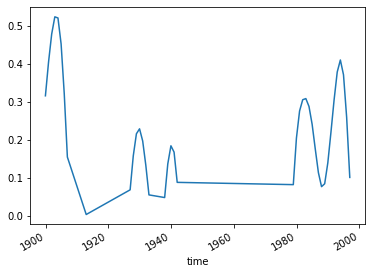

In [16]:
tpi_summer.where(tpi_summer>0,drop=True).plot()

In [17]:
rr

<xarray.DataArray 'rr' (time: 1392, lat: 139, lon: 178)>
[34440864 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0
Attributes:
    long_name:  monthly mean precipitation
    units:      mm/day

In [18]:
rr_modern=rr.sel(time=slice('1900','2014'))
rr_climate=rr_modern.groupby('time.month').mean(dim='time')
rr_anomaly=(rr_modern.groupby('time.month')-rr_climate)

In [19]:
rra_DJF=rr_anomaly.groupby('time.season')['DJF']
rra_summer=rra_DJF.resample(time='AS-DEC').mean()
rra_SON=rr_anomaly.groupby('time.season')['SON']
rra_spring=rra_SON.resample(time='AS-SEP').mean()
rra_MAM=rr_anomaly.groupby('time.season')['MAM']
rra_autumn=rra_MAM.resample(time='AS-MAR').mean()

In [20]:
rra_summer

<xarray.DataArray 'rr' (time: 116, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -3.879758  ,
         -3.8539343 , -3.759096  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.8936327 ,
         -3.9278355 , -3.7557826 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.9037004 ,
         -3.9642215 , -3.913086  ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -3.447205  ,
         -2.9302754 , -2.477726  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.4116125 ,
         -2.900033  , -2.4535224 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.34169   ,
         -2.8414264 , -2.5762568 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -3.55389   ,
         -3.523605  , -3.4281704 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.5609381 ,
         -3.5891368 , -3.421037  ],
        [ 0.        ,  0.        ,  0.        , ..., -3.5638897 ,
         -3.6176598 , -3.5622423 ],
...
        [ 0.        ,  0.        ,  0.        , ..., -3.1954205 ,
         -2.7446063 , -2.3520072 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.163079  ,
         -2.7171457 , -2.3297737 ],
        [ 0.        ,  0.        ,  0.        , ..., -3.1010864 ,
         -2.6654298 , -2.4355474 ]],

       [[ 0.        ,  0.        ,  0.        , ...,  1.8568587 ,
          1.987359  ,  2.1598716 ],
        [ 0.        ,  0.        ,  0.        , ...,  1.8335278 ,
          1.9136875 ,  2.159473  ],
        [ 0.        ,  0.        ,  0.        , ...,  1.8174953 ,
          1.8780677 ,  2.0303936 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.691898  ,
         -2.3733044 , -2.1005943 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.6660385 ,
         -2.3513916 , -2.0822918 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.619895  ,
         -2.3134494 , -2.1541407 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [21]:
rra_spring

<xarray.DataArray 'rr' (time: 115, lat: 139, lon: 178)>
array([[[ 0.        ,  0.        ,  0.        , ..., -2.8008976 ,
         -2.7577946 , -2.6725433 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.791012  ,
         -2.7930129 , -2.6532464 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7782354 ,
         -2.7983358 , -2.7392743 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.814518  ,
         -2.427907  , -2.0946777 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7926216 ,
         -2.410639  , -2.0820558 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7420614 ,
         -2.370055  , -2.1724484 ]],

       [[ 0.        ,  0.        ,  0.        , ..., -2.784853  ,
         -2.7488353 , -2.6665132 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7722547 ,
         -2.7825146 , -2.648149  ],
        [ 0.        ,  0.        ,  0.        , ..., -2.756665  ,
         -2.7861779 , -2.7331927 ],
...
        [ 0.        ,  0.        ,  0.        , ..., -2.8143816 ,
         -2.4278061 , -2.0946062 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7925346 ,
         -2.4105747 , -2.08201   ],
        [ 0.        ,  0.        ,  0.        , ..., -2.742008  ,
         -2.3700154 , -2.1724107 ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.03648055,
          0.12491   ,  0.25033894],
        [ 0.        ,  0.        ,  0.        , ...,  0.0211736 ,
          0.06576105,  0.2494938 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.01057132,
          0.03836946,  0.14226425],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -2.8144894 ,
         -2.4278858 , -2.0946627 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7926028 ,
         -2.4106252 , -2.0820458 ],
        [ 0.        ,  0.        ,  0.        , ..., -2.7420495 ,
         -2.3700466 , -2.1724403 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2014-09-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [22]:
rra_spring.mean(dim='time')

<xarray.DataArray 'rr' (lat: 139, lon: 178)>
array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         5.0689863e-07, -2.6018722e-07,  4.0686650e-08],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.7677288e-07, -4.8130750e-07, -1.5587911e-07],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.3824066e-08, -2.2448923e-08, -2.2908915e-07],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.6537023e-07,  6.6342562e-07,  1.7622243e-07],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.1464099e-07,  8.5416048e-07,  3.0683435e-07],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         4.0634819e-07,  9.1013703e-07,  5.9293666e-07]], dtype=float32)
Coordinates:
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [23]:
positive_DJF_rr=rra_summer.where(tpi_summer > 0, drop = True)
negative_DJF_rr=rra_summer.where(tpi_summer < 0, drop = True)
positive_SON_rr=rra_spring.where(tpi_spring > 0, drop = True)
negative_SON_rr=rra_spring.where(tpi_spring < 0, drop = True)
positive_MAM_rr=rra_autumn.where(tpi_autumn > 0, drop = True)
negative_MAM_rr=rra_autumn.where(tpi_autumn < 0, drop = True)

In [24]:
positive_DJF_rr

<xarray.DataArray 'rr' (time: 40, lat: 139, lon: 178)>
array([[[ 0.       ,  0.       ,  0.       , ..., -3.879758 ,
         -3.8539343, -3.759096 ],
        [ 0.       ,  0.       ,  0.       , ..., -3.8936327,
         -3.9278355, -3.7557826],
        [ 0.       ,  0.       ,  0.       , ..., -3.9037004,
         -3.9642215, -3.913086 ],
        ...,
        [ 0.       ,  0.       ,  0.       , ..., -3.447205 ,
         -2.9302754, -2.477726 ],
        [ 0.       ,  0.       ,  0.       , ..., -3.4116125,
         -2.900033 , -2.4535224],
        [ 0.       ,  0.       ,  0.       , ..., -3.34169  ,
         -2.8414264, -2.5762568]],

       [[ 0.       ,  0.       ,  0.       , ..., -3.55389  ,
         -3.523605 , -3.4281704],
        [ 0.       ,  0.       ,  0.       , ..., -3.5609381,
         -3.5891368, -3.421037 ],
        [ 0.       ,  0.       ,  0.       , ..., -3.5638897,
         -3.6176598, -3.5622423],
...
        [ 0.       ,  0.       ,  0.       , ..., -3.1953385,
         -2.744547 , -2.3519657],
        [ 0.       ,  0.       ,  0.       , ..., -3.1630306,
         -2.71711  , -2.3297489],
        [ 0.       ,  0.       ,  0.       , ..., -3.101059 ,
         -2.6654093, -2.4355278]],

       [[ 0.       ,  0.       ,  0.       , ...,  1.5329443,
          1.640309 ,  1.7781597],
        [ 0.       ,  0.       ,  0.       , ...,  1.4616772,
          1.5364847,  1.7805113],
        [ 0.       ,  0.       ,  0.       , ...,  1.3938423,
          1.4490529,  1.6057048],
        ...,
        [ 0.       ,  0.       ,  0.       , ..., -3.1952677,
         -2.7444963, -2.3519309],
        [ 0.       ,  0.       ,  0.       , ..., -3.1629868,
         -2.7170784, -2.3297272],
        [ 0.       ,  0.       ,  0.       , ..., -3.101033 ,
         -2.6653907, -2.4355104]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 1996-12-01
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 155.5 155.8 156.0 156.2
  * lat      (lat) float64 -44.5 -44.25 -44.0 -43.75 ... -10.5 -10.25 -10.0

In [25]:
rra_summer=rra_summer.where(landmask>0,drop=True)
rra_spring=rra_spring.where(landmask>0,drop=True)
rra_autumn=rra_autumn.where(landmask>0,drop=True)

NameError: name 'landmask' is not defined

In [26]:
ds3=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/bom_aust_mask_smooth.nc')
landmask=ds3.landmask
rra_summer=rra_summer.where(landmask>0,drop=True)
rra_spring=rra_spring.where(landmask>0,drop=True)
rra_autumn=rra_autumn.where(landmask>0,drop=True)

In [27]:
rra_summer

<xarray.DataArray 'rr' (time: 116, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

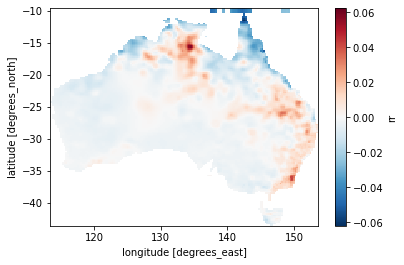

In [28]:
rra_summer.mean(dim='time').plot()

In [29]:
rra_spring

<xarray.DataArray 'rr' (time: 115, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2014-09-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [30]:
nino34_spring

<xarray.DataArray 'sst' (time: 116)>
array([ 0.5194295 , -0.4615679 ,  1.6445876 , -0.929527  ,  0.02000064,
        1.3316568 , -0.664198  , -0.06789067, -0.7270794 , -1.0660355 ,
       -1.1120853 ,  0.40779757, -0.263554  ,  0.1004582 ,  0.98809767,
       -0.22911136, -1.1291171 , -1.3532538 ,  0.5910383 , -0.29157427,
        0.06855739,  0.12114506, -1.0637084 ,  0.3321265 , -1.1713861 ,
        0.26682505, -0.27414024, -0.13661565, -0.18850322, -0.05800107,
        0.8621154 , -0.22429514, -0.13034199, -1.3298393 , -0.27491358,
       -0.17062248, -0.302799  , -0.045455  , -1.4039043 ,  0.13809706,
        0.9015319 ,  0.8806662 , -1.2374806 , -0.19163878, -0.13370469,
       -0.6316872 , -0.97482735, -0.40756163, -0.77617455, -0.70639235,
       -0.6827343 ,  0.7085099 , -0.11867011,  0.620065  , -0.88466865,
       -1.0875925 , -0.6154797 ,  1.168385  ,  0.37984776, -0.24175353,
        0.0603161 , -0.19180322, -0.26547912,  0.8686022 , -0.8155759 ,
        1.3486212 ,  0.12108345, -0.12570688,  0.5070981 ,  0.62194973,
       -0.6077135 , -0.7015686 ,  1.4629226 , -1.1912123 , -0.44333783,
       -1.1278249 ,  0.51211756,  0.6116078 , -0.22589944,  0.3359152 ,
        0.2658915 , -0.0252557 ,  1.4225427 ,  0.13682754, -0.1431473 ,
       -0.26567072,  0.658385  ,  1.712865  , -1.0726916 , -0.08579271,
        0.552723  ,  1.0679814 ,  0.54556257,  0.6641088 ,  0.9005582 ,
       -0.13343039,  0.0251784 ,  2.1911294 , -0.5850648 , -0.7811051 ,
       -0.22300565,  0.26725212,  1.3325051 ,  0.5614468 ,  0.9824851 ,
        0.33248207,  0.75316733, -0.43333992,  0.05569863,  1.0228671 ,
       -0.83069867, -0.25586116,  0.6598509 ,  0.1060278 ,  0.6067803 ,
        2.2423546 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2015-09-01

In [31]:
tpi_summer

<xarray.DataArray (time: 116)>
array([ 0.316     ,  0.405     ,  0.47866667,  0.524     ,  0.521     ,
        0.45266667,  0.322     ,  0.15466667, -0.014     , -0.13566667,
       -0.17266667, -0.128     , -0.047     ,  0.00333333, -0.01266667,
       -0.088     , -0.192     , -0.27866667, -0.31433333, -0.29966667,
       -0.264     , -0.23033333, -0.21      , -0.19833333, -0.174     ,
       -0.118     , -0.031     ,  0.06833333,  0.15766667,  0.216     ,
        0.229     ,  0.197     ,  0.133     ,  0.055     , -0.02666667,
       -0.08666667, -0.097     , -0.04366667,  0.048     ,  0.13666667,
        0.18433333,  0.16766667,  0.088     , -0.032     , -0.161     ,
       -0.27333333, -0.35566667, -0.40866667, -0.445     , -0.472     ,
       -0.487     , -0.492     , -0.49533333, -0.496     , -0.48666667,
       -0.45766667, -0.4       , -0.321     , -0.23733333, -0.176     ,
       -0.15766667, -0.171     , -0.19266667, -0.196     , -0.16766667,
       -0.11666667, -0.07766667, -0.073     , -0.103     , -0.164     ,
       -0.24833333, -0.347     , -0.43966667, -0.50233333, -0.51766667,
       -0.47033333, -0.365     , -0.226     , -0.071     ,  0.082     ,
        0.20466667,  0.276     ,  0.30566667,  0.30866667,  0.288     ,
        0.241     ,  0.176     ,  0.11366667,  0.07666667,  0.08433333,
        0.13933333,  0.22      ,  0.305     ,  0.37866667,  0.41033333,
        0.37133333,  0.25966667,  0.101     , -0.06566667, -0.20233333,
       -0.28166667, -0.293     , -0.24566667, -0.175     , -0.119     ,
       -0.10733333, -0.154     , -0.241     , -0.339     , -0.424     ,
       -0.472     , -0.46233333, -0.391     , -0.27833333, -0.157     ,
       -0.072     ])
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01

In [32]:
nino34_spring

<xarray.DataArray 'sst' (time: 116)>
array([ 0.5194295 , -0.4615679 ,  1.6445876 , -0.929527  ,  0.02000064,
        1.3316568 , -0.664198  , -0.06789067, -0.7270794 , -1.0660355 ,
       -1.1120853 ,  0.40779757, -0.263554  ,  0.1004582 ,  0.98809767,
       -0.22911136, -1.1291171 , -1.3532538 ,  0.5910383 , -0.29157427,
        0.06855739,  0.12114506, -1.0637084 ,  0.3321265 , -1.1713861 ,
        0.26682505, -0.27414024, -0.13661565, -0.18850322, -0.05800107,
        0.8621154 , -0.22429514, -0.13034199, -1.3298393 , -0.27491358,
       -0.17062248, -0.302799  , -0.045455  , -1.4039043 ,  0.13809706,
        0.9015319 ,  0.8806662 , -1.2374806 , -0.19163878, -0.13370469,
       -0.6316872 , -0.97482735, -0.40756163, -0.77617455, -0.70639235,
       -0.6827343 ,  0.7085099 , -0.11867011,  0.620065  , -0.88466865,
       -1.0875925 , -0.6154797 ,  1.168385  ,  0.37984776, -0.24175353,
        0.0603161 , -0.19180322, -0.26547912,  0.8686022 , -0.8155759 ,
        1.3486212 ,  0.12108345, -0.12570688,  0.5070981 ,  0.62194973,
       -0.6077135 , -0.7015686 ,  1.4629226 , -1.1912123 , -0.44333783,
       -1.1278249 ,  0.51211756,  0.6116078 , -0.22589944,  0.3359152 ,
        0.2658915 , -0.0252557 ,  1.4225427 ,  0.13682754, -0.1431473 ,
       -0.26567072,  0.658385  ,  1.712865  , -1.0726916 , -0.08579271,
        0.552723  ,  1.0679814 ,  0.54556257,  0.6641088 ,  0.9005582 ,
       -0.13343039,  0.0251784 ,  2.1911294 , -0.5850648 , -0.7811051 ,
       -0.22300565,  0.26725212,  1.3325051 ,  0.5614468 ,  0.9824851 ,
        0.33248207,  0.75316733, -0.43333992,  0.05569863,  1.0228671 ,
       -0.83069867, -0.25586116,  0.6598509 ,  0.1060278 ,  0.6067803 ,
        2.2423546 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2015-09-01

In [33]:
nino34_spring=nino34_spring.sel(time=slice('1900','2014'))
nino34_summer=nino34_summer.sel(time=slice('1900','2014'))
nino34_autumn=nino34_autumn.sel(time=slice('1900','2014'))
nct_spring=nct_spring.sel(time=slice('1900','2014'))
nct_summer=nct_summer.sel(time=slice('1900','2014'))
nct_autumn=nct_autumn.sel(time=slice('1900','2014'))
nwp_spring=nwp_spring.sel(time=slice('1900','2014'))
nwp_summer=nwp_summer.sel(time=slice('1900','2014'))
nwp_autumn=nwp_autumn.sel(time=slice('1900','2014'))

In [34]:
nino34_spring

<xarray.DataArray 'sst' (time: 115)>
array([ 0.5194295 , -0.4615679 ,  1.6445876 , -0.929527  ,  0.02000064,
        1.3316568 , -0.664198  , -0.06789067, -0.7270794 , -1.0660355 ,
       -1.1120853 ,  0.40779757, -0.263554  ,  0.1004582 ,  0.98809767,
       -0.22911136, -1.1291171 , -1.3532538 ,  0.5910383 , -0.29157427,
        0.06855739,  0.12114506, -1.0637084 ,  0.3321265 , -1.1713861 ,
        0.26682505, -0.27414024, -0.13661565, -0.18850322, -0.05800107,
        0.8621154 , -0.22429514, -0.13034199, -1.3298393 , -0.27491358,
       -0.17062248, -0.302799  , -0.045455  , -1.4039043 ,  0.13809706,
        0.9015319 ,  0.8806662 , -1.2374806 , -0.19163878, -0.13370469,
       -0.6316872 , -0.97482735, -0.40756163, -0.77617455, -0.70639235,
       -0.6827343 ,  0.7085099 , -0.11867011,  0.620065  , -0.88466865,
       -1.0875925 , -0.6154797 ,  1.168385  ,  0.37984776, -0.24175353,
        0.0603161 , -0.19180322, -0.26547912,  0.8686022 , -0.8155759 ,
        1.3486212 ,  0.12108345, -0.12570688,  0.5070981 ,  0.62194973,
       -0.6077135 , -0.7015686 ,  1.4629226 , -1.1912123 , -0.44333783,
       -1.1278249 ,  0.51211756,  0.6116078 , -0.22589944,  0.3359152 ,
        0.2658915 , -0.0252557 ,  1.4225427 ,  0.13682754, -0.1431473 ,
       -0.26567072,  0.658385  ,  1.712865  , -1.0726916 , -0.08579271,
        0.552723  ,  1.0679814 ,  0.54556257,  0.6641088 ,  0.9005582 ,
       -0.13343039,  0.0251784 ,  2.1911294 , -0.5850648 , -0.7811051 ,
       -0.22300565,  0.26725212,  1.3325051 ,  0.5614468 ,  0.9824851 ,
        0.33248207,  0.75316733, -0.43333992,  0.05569863,  1.0228671 ,
       -0.83069867, -0.25586116,  0.6598509 ,  0.1060278 ,  0.6067803 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2014-09-01

In [35]:
nct_summer

<xarray.DataArray 'sst' (time: 115)>
array([-8.81182668e-02,  1.71548221e-01,  1.26122239e+00, -8.59218787e-01,
        6.83050276e-01,  8.97563582e-01, -6.78355415e-01, -1.61026608e-01,
       -6.88002053e-01, -1.01046777e+00, -4.38185638e-01,  1.21250288e+00,
       -2.78252386e-01,  5.49483209e-01,  9.48616033e-01, -2.98453881e-01,
       -9.39533069e-01, -6.84270008e-01,  1.26517760e+00,  8.95365554e-01,
       -2.83715550e-01,  9.01204119e-01, -6.83387074e-01,  3.82332600e-01,
       -8.66343114e-01,  7.68500801e-01, -4.22168940e-01,  1.52564521e-01,
       -2.26283502e-01,  6.10323147e-02,  1.32255890e+00, -5.09741994e-01,
        6.68829836e-02, -6.36748432e-01, -2.40647421e-01,  1.22108554e-01,
       -2.80601047e-01,  9.14743586e-03, -3.33871589e-01,  9.18878983e-01,
        1.19739800e+00,  5.09736283e-01, -1.45254809e+00, -2.89581392e-01,
       -4.89093368e-01, -1.36092195e-01, -4.91720097e-01, -4.68478463e-01,
       -6.85191646e-01, -1.04799158e+00, -1.56993294e-01,  7.67295943e-01,
       -9.28223743e-02,  3.45600047e-01, -7.18089754e-01, -1.01950326e+00,
       -4.58016155e-01,  1.07526117e+00, -8.68552810e-03, -7.12582323e-02,
       -2.01932661e-01, -4.04588587e-01, -3.61511182e-01,  6.76159242e-01,
       -3.83180437e-01,  1.18182497e+00, -3.95531499e-01, -8.54023715e-01,
        2.48273036e-01,  5.33137256e-01, -6.76031307e-01, -5.57344684e-01,
        1.82059955e+00, -7.80827860e-01, -2.51887712e-01, -5.44222076e-01,
        1.06161043e+00,  2.39816528e-01, -3.75009576e-03,  5.87788441e-01,
       -2.01530411e-02,  1.38284378e-01,  2.39417624e+00,  2.22025476e-02,
       -3.59345621e-01, -3.18289516e-01,  8.12055016e-01,  9.65651404e-01,
       -6.31374564e-01, -4.41775398e-02, -2.59487073e-03,  8.72459540e-01,
       -3.49552546e-02,  2.98664479e-01,  4.93254314e-01, -5.06409013e-01,
       -2.79802652e-01,  3.02244994e+00, -2.09197074e-01, -6.84869608e-01,
       -1.64511972e-02, -1.83883861e-01,  8.94044240e-01,  5.53739939e-01,
        4.08486073e-01, -3.36454056e-01,  7.93988899e-01, -8.25197993e-01,
        3.44614375e-01,  8.38755007e-01, -5.64109425e-01, -2.49068949e-01,
        1.00454369e-01, -1.48807658e-02,  5.02472104e-01])
Coordinates:
  * time     (time) datetime64[ns] 1900-12-01 1901-12-01 ... 2014-12-01

In [36]:
nwp_autumn

<xarray.DataArray 'sst' (time: 115)>
array([ 0.26353049,  0.41256309, -0.02964767,  0.56895814, -0.63869384,
       -0.02924985, -0.03667985, -0.20763248,  0.1768778 , -0.34353274,
       -0.72885049, -0.33664846, -0.21147018, -0.16684785,  0.23602166,
        0.63614385, -0.83159614, -1.94032875, -0.5073785 ,  0.11503827,
       -0.25049165, -0.41524198,  0.03585477, -0.25019815,  0.3983366 ,
       -0.59345683,  0.15621168, -0.79836008, -0.06262103, -0.11656819,
        0.22753266, -0.14344678, -0.13378941, -0.48242285, -0.94024759,
       -0.02531963, -0.13299789, -0.24701486, -0.26758684, -0.49067352,
        0.12182021,  0.39772206,  0.59597582, -0.29417872, -0.09084385,
       -0.27388197, -0.08225897,  0.45511985, -0.54072406, -0.17133121,
       -0.61589828, -0.33699103,  0.12391892, -0.04176075,  0.26424214,
       -0.37521919, -0.53950787, -0.02248716,  0.50523659,  0.22168265,
       -0.15471802,  0.01025711, -0.04308743, -0.07237413,  0.11291588,
       -0.41763832,  0.50005127,  0.05539701,  0.17874477,  0.86490551,
        0.45284137, -0.52626708,  0.13724859,  0.21239103, -0.72204009,
       -0.24432985, -0.61360748, -0.02758758,  0.41267488,  0.26360386,
        0.51324503,  0.22163239,  0.29919409, -0.29308719, -0.29278448,
       -0.17081937,  0.1978716 ,  0.24278192,  0.54812413, -0.65127404,
        0.49130114,  0.77182018,  0.46802526,  0.27704396,  0.40788047,
        0.84702758,  0.0949113 ,  0.5519241 , -0.29080504, -0.79142177,
       -0.65329699, -0.28390491,  0.67939366,  0.70823596,  0.46215126,
        0.88716646,  0.0459477 ,  0.67926181, -0.57452392, -0.18058093,
        0.82559966, -0.39752751, -0.32441638,  0.25923978,  0.46885316])
Coordinates:
  * time     (time) datetime64[ns] 1900-03-01 1901-03-01 ... 2014-03-01

In [37]:
tpi_summer

<xarray.DataArray (time: 116)>
array([ 0.316     ,  0.405     ,  0.47866667,  0.524     ,  0.521     ,
        0.45266667,  0.322     ,  0.15466667, -0.014     , -0.13566667,
       -0.17266667, -0.128     , -0.047     ,  0.00333333, -0.01266667,
       -0.088     , -0.192     , -0.27866667, -0.31433333, -0.29966667,
       -0.264     , -0.23033333, -0.21      , -0.19833333, -0.174     ,
       -0.118     , -0.031     ,  0.06833333,  0.15766667,  0.216     ,
        0.229     ,  0.197     ,  0.133     ,  0.055     , -0.02666667,
       -0.08666667, -0.097     , -0.04366667,  0.048     ,  0.13666667,
        0.18433333,  0.16766667,  0.088     , -0.032     , -0.161     ,
       -0.27333333, -0.35566667, -0.40866667, -0.445     , -0.472     ,
       -0.487     , -0.492     , -0.49533333, -0.496     , -0.48666667,
       -0.45766667, -0.4       , -0.321     , -0.23733333, -0.176     ,
       -0.15766667, -0.171     , -0.19266667, -0.196     , -0.16766667,
       -0.11666667, -0.07766667, -0.073     , -0.103     , -0.164     ,
       -0.24833333, -0.347     , -0.43966667, -0.50233333, -0.51766667,
       -0.47033333, -0.365     , -0.226     , -0.071     ,  0.082     ,
        0.20466667,  0.276     ,  0.30566667,  0.30866667,  0.288     ,
        0.241     ,  0.176     ,  0.11366667,  0.07666667,  0.08433333,
        0.13933333,  0.22      ,  0.305     ,  0.37866667,  0.41033333,
        0.37133333,  0.25966667,  0.101     , -0.06566667, -0.20233333,
       -0.28166667, -0.293     , -0.24566667, -0.175     , -0.119     ,
       -0.10733333, -0.154     , -0.241     , -0.339     , -0.424     ,
       -0.472     , -0.46233333, -0.391     , -0.27833333, -0.157     ,
       -0.072     ])
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01

In [38]:
tpi_summer=tpi_summer.sel(time=slice('1900','2014'))

In [39]:
tpi_summer

<xarray.DataArray (time: 115)>
array([ 0.405     ,  0.47866667,  0.524     ,  0.521     ,  0.45266667,
        0.322     ,  0.15466667, -0.014     , -0.13566667, -0.17266667,
       -0.128     , -0.047     ,  0.00333333, -0.01266667, -0.088     ,
       -0.192     , -0.27866667, -0.31433333, -0.29966667, -0.264     ,
       -0.23033333, -0.21      , -0.19833333, -0.174     , -0.118     ,
       -0.031     ,  0.06833333,  0.15766667,  0.216     ,  0.229     ,
        0.197     ,  0.133     ,  0.055     , -0.02666667, -0.08666667,
       -0.097     , -0.04366667,  0.048     ,  0.13666667,  0.18433333,
        0.16766667,  0.088     , -0.032     , -0.161     , -0.27333333,
       -0.35566667, -0.40866667, -0.445     , -0.472     , -0.487     ,
       -0.492     , -0.49533333, -0.496     , -0.48666667, -0.45766667,
       -0.4       , -0.321     , -0.23733333, -0.176     , -0.15766667,
       -0.171     , -0.19266667, -0.196     , -0.16766667, -0.11666667,
       -0.07766667, -0.073     , -0.103     , -0.164     , -0.24833333,
       -0.347     , -0.43966667, -0.50233333, -0.51766667, -0.47033333,
       -0.365     , -0.226     , -0.071     ,  0.082     ,  0.20466667,
        0.276     ,  0.30566667,  0.30866667,  0.288     ,  0.241     ,
        0.176     ,  0.11366667,  0.07666667,  0.08433333,  0.13933333,
        0.22      ,  0.305     ,  0.37866667,  0.41033333,  0.37133333,
        0.25966667,  0.101     , -0.06566667, -0.20233333, -0.28166667,
       -0.293     , -0.24566667, -0.175     , -0.119     , -0.10733333,
       -0.154     , -0.241     , -0.339     , -0.424     , -0.472     ,
       -0.46233333, -0.391     , -0.27833333, -0.157     , -0.072     ])
Coordinates:
  * time     (time) datetime64[ns] 1900-12-01 1901-12-01 ... 2014-12-01

In [40]:
tpi_spring

<xarray.DataArray (time: 115)>
array([ 3.83000000e-01,  4.62000000e-01,  5.16000000e-01,  5.27666667e-01,
        4.76666667e-01,  3.59333333e-01,  1.98333333e-01,  2.53333333e-02,
       -1.12666667e-01, -1.71666667e-01, -1.45000000e-01, -6.70000000e-02,
       -4.00000000e-03, -2.33333333e-03, -6.53333333e-02, -1.66000000e-01,
       -2.60666667e-01, -3.11000000e-01, -3.06000000e-01, -2.73333333e-01,
       -2.37666667e-01, -2.14000000e-01, -2.02000000e-01, -1.82333333e-01,
       -1.35666667e-01, -5.46666667e-02,  4.36666667e-02,  1.38000000e-01,
        2.05000000e-01,  2.30000000e-01,  2.08666667e-01,  1.50666667e-01,
        7.53333333e-02, -7.00000000e-03, -7.56666667e-02, -1.00333333e-01,
       -6.20000000e-02,  2.40000000e-02,  1.17000000e-01,  1.78000000e-01,
        1.78000000e-01,  1.13000000e-01,  3.33333333e-04, -1.29666667e-01,
       -2.47666667e-01, -3.38666667e-01, -3.97666667e-01, -4.37000000e-01,
       -4.66000000e-01, -4.85000000e-01, -4.91333333e-01, -4.94666667e-01,
       -4.96666667e-01, -4.90666667e-01, -4.67000000e-01, -4.17000000e-01,
       -3.42000000e-01, -2.57000000e-01, -1.87333333e-01, -1.58333333e-01,
       -1.66000000e-01, -1.88000000e-01, -1.98000000e-01, -1.78000000e-01,
       -1.29666667e-01, -8.43333333e-02, -7.06666667e-02, -9.20000000e-02,
       -1.46333333e-01, -2.25333333e-01, -3.21666667e-01, -4.18666667e-01,
       -4.90666667e-01, -5.19000000e-01, -4.88000000e-01, -3.95666667e-01,
       -2.63000000e-01, -1.11000000e-01,  4.53333333e-02,  1.78666667e-01,
        2.63000000e-01,  3.01000000e-01,  3.10000000e-01,  2.95666667e-01,
        2.55000000e-01,  1.93000000e-01,  1.28000000e-01,  8.23333333e-02,
        7.80000000e-02,  1.22333333e-01,  1.99000000e-01,  2.84000000e-01,
        3.62666667e-01,  4.08333333e-01,  3.88666667e-01,  2.93000000e-01,
        1.43000000e-01, -2.53333333e-02, -1.72666667e-01, -2.68000000e-01,
       -2.96333333e-01, -2.61000000e-01, -1.92000000e-01, -1.30000000e-01,
       -1.04333333e-01, -1.37000000e-01, -2.17000000e-01, -3.14666667e-01,
       -4.05333333e-01, -4.65000000e-01, -4.71000000e-01, -4.14000000e-01,
       -3.09000000e-01, -1.86000000e-01, -8.43333333e-02])
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2014-09-01

In [41]:
rra_spring

<xarray.DataArray 'rr' (time: 115, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2014-09-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [42]:
rra_summer

<xarray.DataArray 'rr' (time: 116, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2014-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [43]:
rra_summer=rra_summer.sel(time=slice('1900','2014'))

In [44]:
rra_summer

<xarray.DataArray 'rr' (time: 115, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-12-01 1901-12-01 ... 2014-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [45]:
rra_summer.where(tpi_summer > 0 & nino34_summer > 0.5)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [46]:
rra_summer.where(tpi_summer > 0)

<xarray.DataArray 'rr' (time: 115, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-12-01 1901-12-01 ... 2014-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [47]:
rra_summer.where(tpi_summer>0)

<xarray.DataArray 'rr' (time: 115, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-12-01 1901-12-01 ... 2014-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [48]:
rra_summer.where(nino34_summer>0.5)

<xarray.DataArray 'rr' (time: 115, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-12-01 1901-12-01 ... 2014-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [49]:
rra_summer.where(tpi_summer>0&nino34_summer>0.5)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
rra_summer.where(tpi_summer>0 and nino34_summer>0.5)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [51]:
rra_summer.where(tpi_summer>0,nino34_summer>0.5)

<xarray.DataArray 'rr' (time: 115, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-12-01 1901-12-01 ... 2014-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [52]:
rra_summer.where(tpi_summer>0,nino34_summer>0.5,drop=True)

ValueError: cannot set `other` if drop=True

In [53]:
rra_summer_t1=rra_summer.where(tpi_summer > 0, drop = True)
rra_summer_t2=rra_summer.where(tpi_summer < 0, drop = True)
rra_spring_t1=rra_spring.where(tpi_spring > 0, drop = True)
rra_spring_t2=rra_spring.where(tpi_spring < 0, drop = True)
rra_autumn_t1=rra_autumn.where(tpi_autumn > 0, drop = True)
rra_autumn_t2=rra_autumn.where(tpi_autumn < 0, drop = True)

In [54]:
rra_summer_t1

<xarray.DataArray 'rr' (time: 39, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-12-01 1901-12-01 ... 1996-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [55]:
rra_spring_t2

<xarray.DataArray 'rr' (time: 75, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1908-09-01 1909-09-01 ... 2014-09-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [56]:
nino_rra_summer_t1=rra_summer_t1.where(nino34_summer > 0.5, drop = True)

In [57]:
nino_rra_summer_t1

<xarray.DataArray 'rr' (time: 13, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1902-12-01 1904-12-01 ... 1994-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

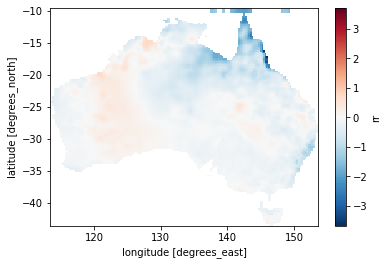

In [58]:
nino_rra_summer_t1.mean(dim='time').plot()

In [59]:
nino_rra_summer_t2=rra_summer_t2.where(nino34_summer > 0.5, drop = True)

In [60]:
nino_rra_summer_t2

<xarray.DataArray 'rr' (time: 24, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1911-12-01 1913-12-01 ... 2014-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [61]:
nina_rr_summer_t1=rr_summer_t1.where(nino34_summer < -0.5, drop = True)

NameError: name 'rr_summer_t1' is not defined

In [62]:
nina_rra_summer_t1=rra_summer_t1.where(nino34_summer < -0.5, drop = True)

In [63]:
nina_rra_summer_t1

<xarray.DataArray 'rr' (time: 10, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1903-12-01 1906-12-01 ... 1995-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [64]:
nina_rra_summer_t1.mean(dim='time')

<xarray.DataArray 'rr' (lat: 126, lon: 161)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

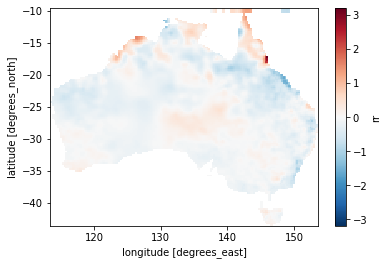

In [65]:
nina_rra_summer_t1.mean(dim='time').plot()

In [66]:
nino_rra_summer_t1=rra_summer_t1.where(nino34_summer > 0.5, drop = True)
nina_rra_summer_t1=rra_summer_t1.where(nino34_summer < -0.5, drop = True)
nino_rra_spring_t1=rra_spring_t1.where(nino34_spring > 0.5, drop = True)
nina_rra_spring_t1=rra_spring_t1.where(nino34_spring < -0.5, drop = True)
nino_rra_autumn_t1=rra_autumn_t1.where(nino34_autumn > 0.5, drop = True)
nina_rra_autumn_t1=rra_autumn_t1.where(nino34_autumn < -0.5, drop = True)
nino_EP_rra_summer_t1=rra_summer_t1.where(nct_summer > 0.5, drop = True)
nina_EP_rra_summer_t1=rra_summer_t1.where(nct_summer < -0.5, drop = True)
nino_EP_rra_spring_t1=rra_spring_t1.where(nct_spring > 0.5, drop = True)
nina_EP_rra_spring_t1=rra_spring_t1.where(nct_spring < -0.5, drop = True)
nino_EP_rra_autumn_t1=rra_autumn_t1.where(nct_autumn > 0.5, drop = True)
nina_EP_rra_autumn_t1=rra_autumn_t1.where(nct_autumn < -0.5, drop = True)
nino_CP_rra_summer_t1=rra_summer_t1.where(nwp_summer > 0.5, drop = True)
nina_CP_rra_summer_t1=rra_summer_t1.where(nwp_summer < -0.5, drop = True)
nino_CP_rra_spring_t1=rra_spring_t1.where(nwp_spring > 0.5, drop = True)
nina_CP_rra_spring_t1=rra_spring_t1.where(nwp_spring < -0.5, drop = True)
nino_CP_rra_autumn_t1=rra_autumn_t1.where(nwp_autumn > 0.5, drop = True)
nina_CP_rra_autumn_t1=rra_autumn_t1.where(nwp_autumn < -0.5, drop = True)
nino_rra_summer_t2=rra_summer_t2.where(nino34_summer > 0.5, drop = True)
nina_rra_summer_t2=rra_summer_t2.where(nino34_summer < -0.5, drop = True)
nino_rra_spring_t2=rra_spring_t2.where(nino34_spring > 0.5, drop = True)
nina_rra_spring_t2=rra_spring_t2.where(nino34_spring < -0.5, drop = True)
nino_rra_autumn_t2=rra_autumn_t2.where(nino34_autumn > 0.5, drop = True)
nina_rra_autumn_t2=rra_autumn_t2.where(nino34_autumn < -0.5, drop = True)
nino_EP_rra_summer_t2=rra_summer_t2.where(nct_summer > 0.5, drop = True)
nina_EP_rra_summer_t2=rra_summer_t2.where(nct_summer < -0.5, drop = True)
nino_EP_rra_spring_t2=rra_spring_t2.where(nct_spring > 0.5, drop = True)
nina_EP_rra_spring_t2=rra_spring_t2.where(nct_spring < -0.5, drop = True)
nino_EP_rra_autumn_t2=rra_autumn_t2.where(nct_autumn > 0.5, drop = True)
nina_EP_rra_autumn_t2=rra_autumn_t2.where(nct_autumn < -0.5, drop = True)
nino_CP_rra_summer_t2=rra_summer_t2.where(nwp_summer > 0.5, drop = True)
nina_CP_rra_summer_t2=rra_summer_t2.where(nwp_summer < -0.5, drop = True)
nino_CP_rra_spring_t2=rra_spring_t2.where(nwp_spring > 0.5, drop = True)
nina_CP_rra_spring_t2=rra_spring_t2.where(nwp_spring < -0.5, drop = True)
nino_CP_rra_autumn_t2=rra_autumn_t2.where(nwp_autumn > 0.5, drop = True)
nina_CP_rra_autumn_t2=rra_autumn_t2.where(nwp_autumn < -0.5, drop = True)

In [67]:
import cartopy.crs as ccrs

ValueError: too many values to unpack (expected 2)

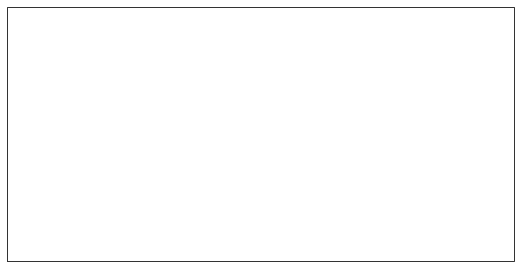

In [68]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_rra_summer_t1.lon, nino_rra_summer_t1.lat, nino_rra_summer_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite DJF during positive IPO')

In [69]:
nino_rra_summer_t1

<xarray.DataArray 'rr' (time: 13, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1902-12-01 1904-12-01 ... 1994-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [70]:
a=nino_rra_summer_t1

ValueError: too many values to unpack (expected 2)

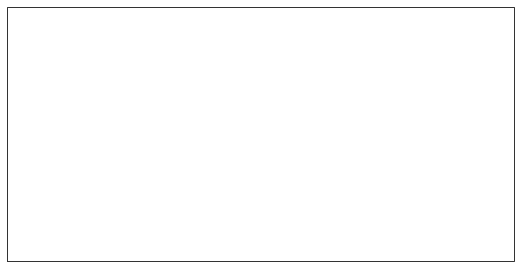

In [71]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(a.lon, a.lat, a, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite DJF during positive IPO')

In [72]:
nina_CP_rra_summer_t2

<xarray.DataArray 'rr' (time: 13, lat: 126, lon: 161)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1910-12-01 1915-12-01 ... 2010-12-01
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * lat      (lat) float64 -43.5 -43.25 -43.0 -42.75 ... -11.0 -10.75 -10.0

In [73]:
nino_rra_summer_t1=nino_rra_summer_t1.mean(dim='time')
nina_rra_summer_t1=nina_rra_summer_t1.mean(dim='time')
nino_rra_spring_t1=nino_rra_spring_t1.mean(dim='time')
nina_rra_spring_t1=nina_rra_spring_t1.mean(dim='time')
nino_rra_autumn_t1=nino_rra_autumn_t1.mean(dim='time')
nina_rra_autumn_t1=nina_rra_autumn_t1.mean(dim='time')
nino_EP_rra_summer_t1=nino_EP_rra_summer_t1.mean(dim='time')
nina_EP_rra_summer_t1=nina_EP_rra_summer_t1.mean(dim='time')
nino_EP_rra_spring_t1=nino_EP_rra_spring_t1.mean(dim='time')
nina_EP_rra_spring_t1=nina_EP_rra_spring_t1.mean(dim='time')
nino_EP_rra_autumn_t1=nino_EP_rra_autumn_t1.mean(dim='time')
nina_EP_rra_autumn_t1=nina_EP_rra_autumn_t1.mean(dim='time')
nino_CP_rra_summer_t1=nino_CP_rra_summer_t1.mean(dim='time')
nina_CP_rra_summer_t1=nina_CP_rra_summer_t1.mean(dim='time')
nino_CP_rra_spring_t1=nino_CP_rra_spring_t1.mean(dim='time')
nina_CP_rra_spring_t1=nina_CP_rra_spring_t1.mean(dim='time')
nino_CP_rra_autumn_t1=nino_CP_rra_autumn_t1.mean(dim='time')
nina_CP_rra_autumn_t1=nina_CP_rra_autumn_t1.mean(dim='time')
nino_rra_summer_t2=nino_rra_summer_t2.mean(dim='time')
nina_rra_summer_t2=nina_rra_summer_t2.mean(dim='time')
nino_rra_spring_t2=nino_rra_spring_t2.mean(dim='time')
nina_rra_spring_t2=nina_rra_spring_t2.mean(dim='time')
nino_rra_autumn_t2=nino_rra_autumn_t2.mean(dim='time')
nina_rra_autumn_t2=nina_rra_autumn_t2.mean(dim='time')
nino_EP_rra_summer_t2=nino_EP_rra_summer_t2.mean(dim='time')
nina_EP_rra_summer_t2=nina_EP_rra_summer_t2.mean(dim='time')
nino_EP_rra_spring_t2=nino_EP_rra_spring_t2.mean(dim='time')
nina_EP_rra_spring_t2=nina_EP_rra_spring_t2.mean(dim='time')
nino_EP_rra_autumn_t2=nino_EP_rra_autumn_t2.mean(dim='time')
nina_EP_rra_autumn_t2=nina_EP_rra_autumn_t2.mean(dim='time')
nino_CP_rra_summer_t2=nino_CP_rra_summer_t2.mean(dim='time')
nina_CP_rra_summer_t2=nina_CP_rra_summer_t2.mean(dim='time')
nino_CP_rra_spring_t2=nino_CP_rra_spring_t2.mean(dim='time')
nina_CP_rra_spring_t2=nina_CP_rra_spring_t2.mean(dim='time')
nino_CP_rra_autumn_t2=nino_CP_rra_autumn_t2.mean(dim='time')
nina_CP_rra_autumn_t2=nina_CP_rra_autumn_t2.mean(dim='time')

Text(0.5, 1.0, 'El Nino rainfall composite DJF during positive IPO')

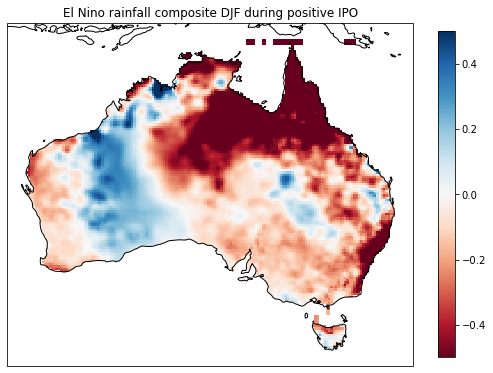

In [74]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_rra_summer_t1.lon, nino_rra_summer_t1.lat, nino_rra_summer_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.5, 0.5)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite DJF during positive IPO')

Text(0.5, 1.0, 'El Nino rainfall composite DJF during positive IPO')

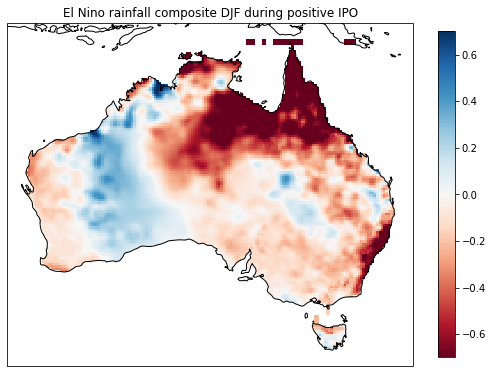

In [75]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_rra_summer_t1.lon, nino_rra_summer_t1.lat, nino_rra_summer_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-0.7, 0.7)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite DJF during positive IPO')

Text(0.5, 1.0, 'El Nino rainfall composite DJF during positive IPO')

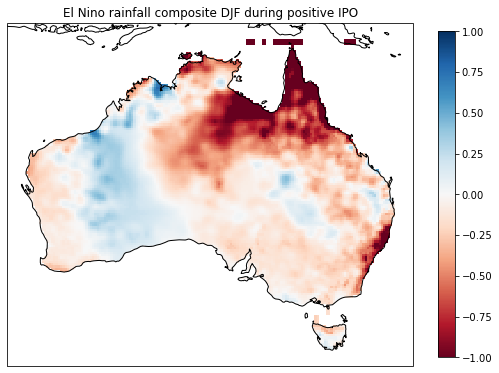

In [76]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_rra_summer_t1.lon, nino_rra_summer_t1.lat, nino_rra_summer_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite DJF during positive IPO')

Text(0.5, 1.0, 'La Nina rainfall composite DJF during positive IPO')

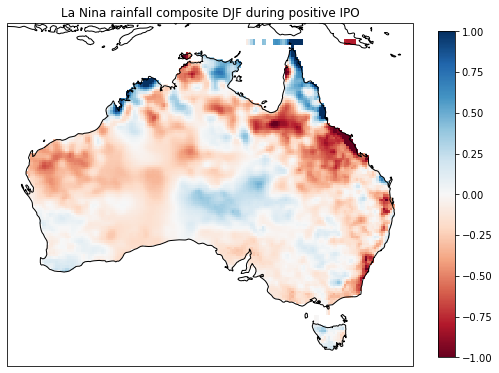

In [77]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_rra_summer_t1.lon, nina_rra_summer_t1.lat, nina_rra_summer_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina rainfall composite DJF during positive IPO')

Text(0.5, 1.0, 'El Nino rainfall composite SON during positive IPO')

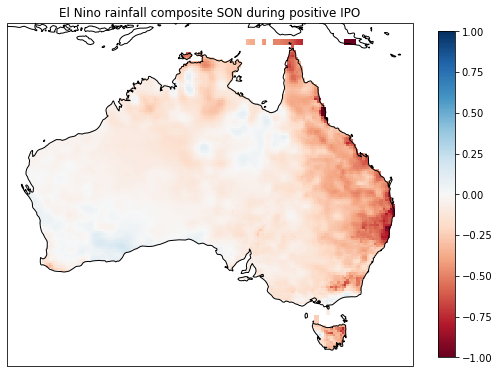

In [78]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_rra_spring_t1.lon, nino_rra_spring_t1.lat, nino_rra_spring_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite SON during positive IPO')

Text(0.5, 1.0, 'La Nina rainfall composite SON during positive IPO')

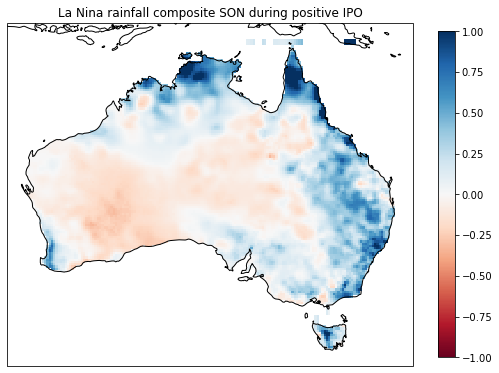

In [79]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_rra_spring_t1.lon, nina_rra_spring_t1.lat, nina_rra_spring_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina rainfall composite SON during positive IPO')

Text(0.5, 1.0, 'El Nino rainfall composite MAM during positive IPO')

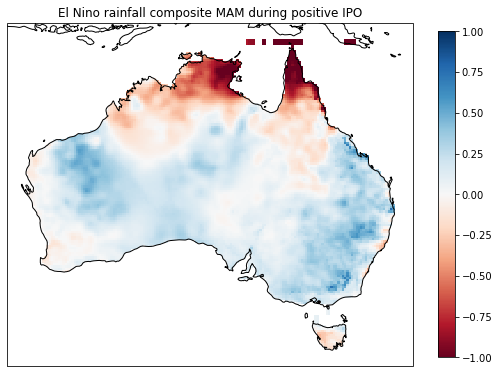

In [80]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_rra_autumn_t1.lon, nino_rra_autumn_t1.lat, nino_rra_autumn_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite MAM during positive IPO')

Text(0.5, 1.0, 'La Nina rainfall composite MAM during positive IPO')

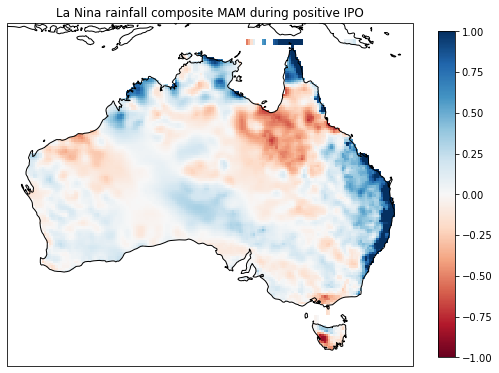

In [81]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_rra_autumn_t1.lon, nina_rra_autumn_t1.lat, nina_rra_autumn_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina rainfall composite MAM during positive IPO')

Text(0.5, 1.0, 'El Nino EP rainfall composite DJF during positive IPO')

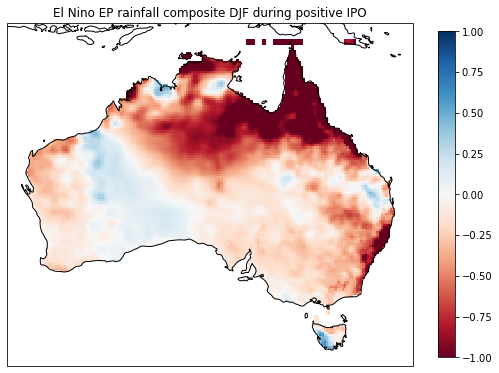

In [82]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_EP_rra_summer_t1.lon, nino_EP_rra_summer_t1.lat, nino_EP_rra_summer_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino EP rainfall composite DJF during positive IPO')

Text(0.5, 1.0, 'La Nina EP rainfall composite DJF during positive IPO')

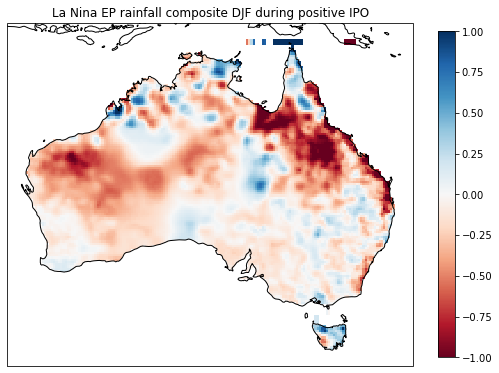

In [83]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_EP_rra_summer_t1.lon, nina_EP_rra_summer_t1.lat, nina_EP_rra_summer_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina EP rainfall composite DJF during positive IPO')

Text(0.5, 1.0, 'El Nino EP rainfall composite SON during positive IPO')

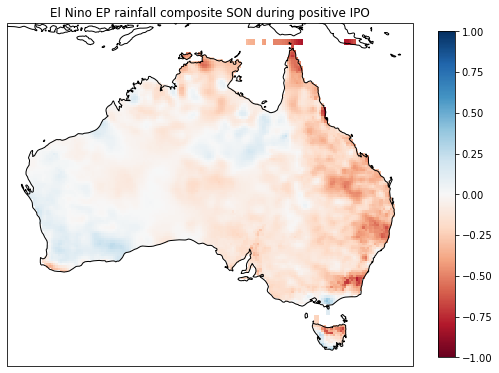

In [84]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_EP_rra_spring_t1.lon, nino_EP_rra_spring_t1.lat, nino_EP_rra_spring_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino EP rainfall composite SON during positive IPO')

Text(0.5, 1.0, 'La Nina EP rainfall composite SON during positive IPO')

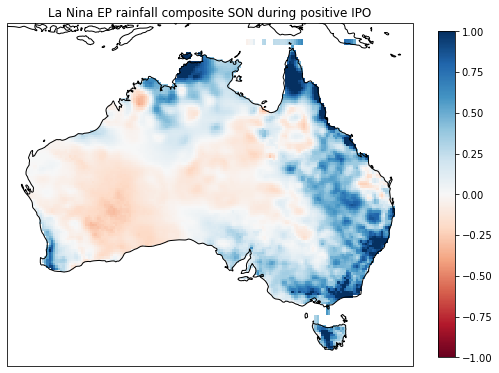

In [85]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_EP_rra_spring_t1.lon, nina_EP_rra_spring_t1.lat, nina_EP_rra_spring_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina EP rainfall composite SON during positive IPO')

Text(0.5, 1.0, 'El Nino EP rainfall composite MAM during positive IPO')

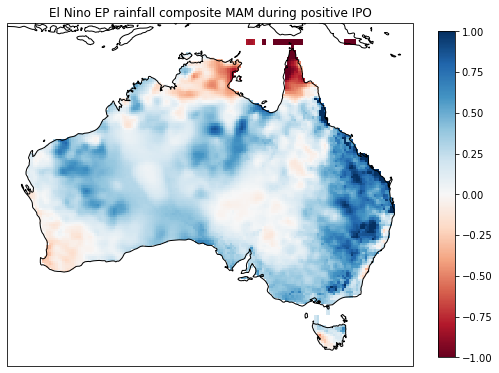

In [86]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_EP_rra_autumn_t1.lon, nino_EP_rra_autumn_t1.lat, nino_EP_rra_autumn_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino EP rainfall composite MAM during positive IPO')

Text(0.5, 1.0, 'La Nina EP rainfall composite MAM during positive IPO')

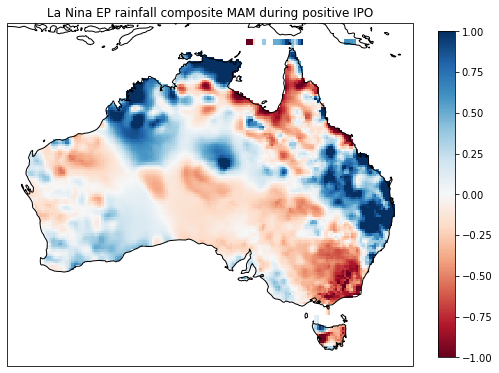

In [87]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_EP_rra_autumn_t1.lon, nina_EP_rra_autumn_t1.lat, nina_EP_rra_autumn_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina EP rainfall composite MAM during positive IPO')

Text(0.5, 1.0, 'El Nino CP rainfall composite DJF during positive IPO')

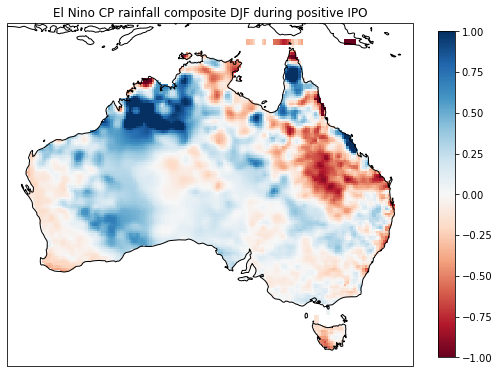

In [88]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_rra_summer_t1.lon, nino_CP_rra_summer_t1.lat, nino_CP_rra_summer_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino CP rainfall composite DJF during positive IPO')

Text(0.5, 1.0, 'La Nina CP rainfall composite DJF during positive IPO')

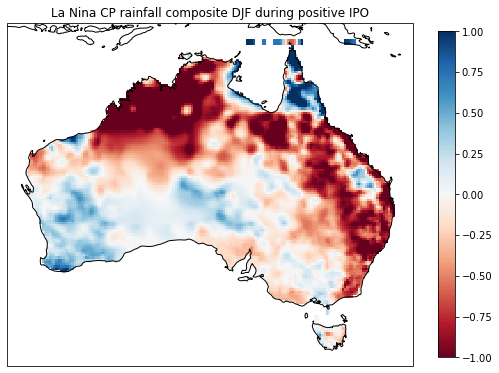

In [89]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_rra_summer_t1.lon, nina_CP_rra_summer_t1.lat, nina_CP_rra_summer_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina CP rainfall composite DJF during positive IPO')

Text(0.5, 1.0, 'El Nino CP rainfall composite SON during positive IPO')

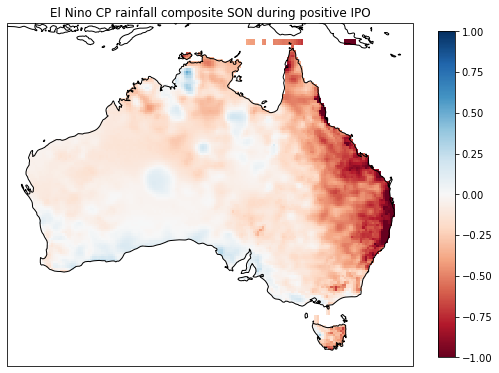

In [90]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_rra_spring_t1.lon, nino_CP_rra_spring_t1.lat, nino_CP_rra_spring_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino CP rainfall composite SON during positive IPO')

Text(0.5, 1.0, 'La Nina CP rainfall composite SON during positive IPO')

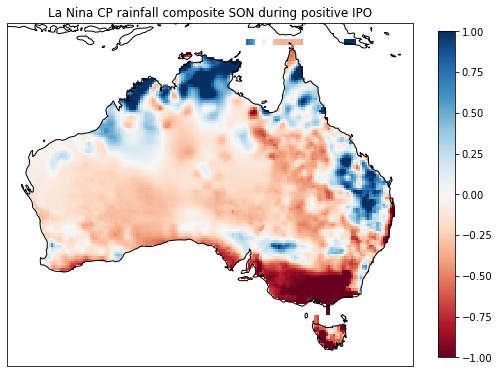

In [91]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_rra_spring_t1.lon, nina_CP_rra_spring_t1.lat, nina_CP_rra_spring_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina CP rainfall composite SON during positive IPO')

Text(0.5, 1.0, 'El Nino CP rainfall composite MAM during positive IPO')

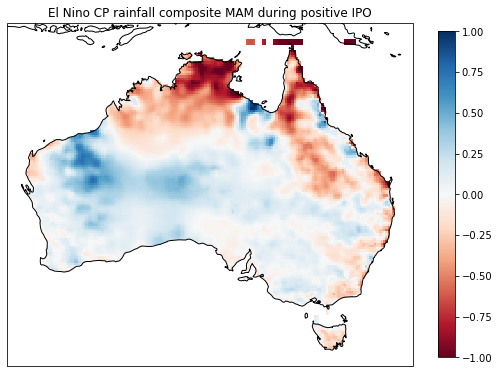

In [92]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_rra_autumn_t1.lon, nino_CP_rra_autumn_t1.lat, nino_CP_rra_autumn_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino CP rainfall composite MAM during positive IPO')

Text(0.5, 1.0, 'La Nina CP rainfall composite MAM during positive IPO')

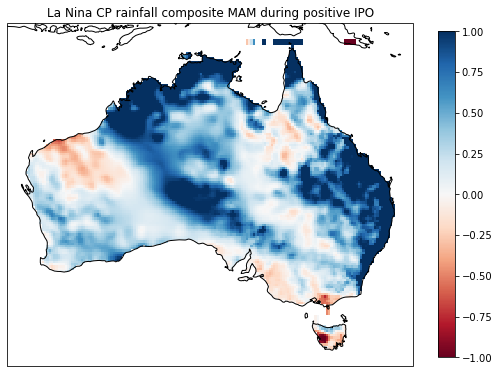

In [93]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_rra_autumn_t1.lon, nina_CP_rra_autumn_t1.lat, nina_CP_rra_autumn_t1, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina CP rainfall composite MAM during positive IPO')

Text(0.5, 1.0, 'El Nino rainfall composite DJF during negative IPO')

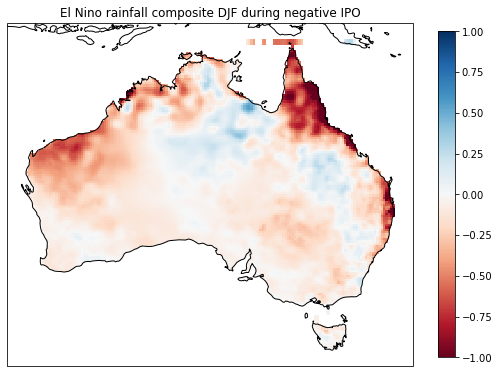

In [94]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_rra_summer_t2.lon, nino_rra_summer_t2.lat, nino_rra_summer_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite DJF during negative IPO')

Text(0.5, 1.0, 'La Nina rainfall composite DJF during negative IPO')

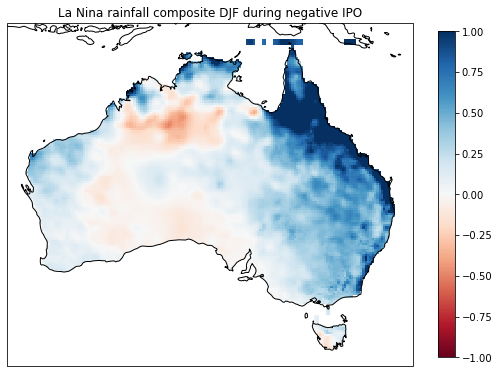

In [95]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_rra_summer_t2.lon, nina_rra_summer_t2.lat, nina_rra_summer_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina rainfall composite DJF during negative IPO')

Text(0.5, 1.0, 'El Nino rainfall composite SON during negative IPO')

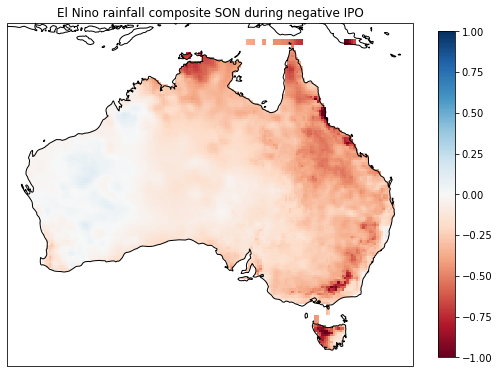

In [96]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_rra_spring_t2.lon, nino_rra_spring_t2.lat, nino_rra_spring_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite SON during negative IPO')

Text(0.5, 1.0, 'La Nina rainfall composite SON during negative IPO')

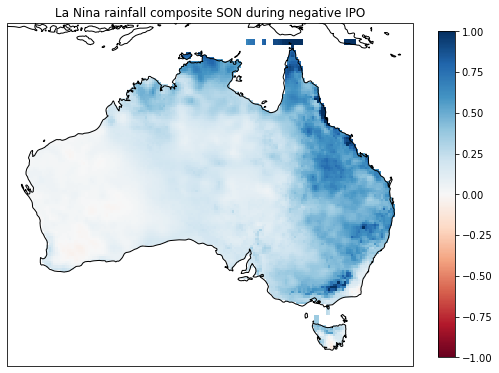

In [97]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_rra_spring_t2.lon, nina_rra_spring_t2.lat, nina_rra_spring_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina rainfall composite SON during negative IPO')

Text(0.5, 1.0, 'El Nino rainfall composite MAM during negative IPO')

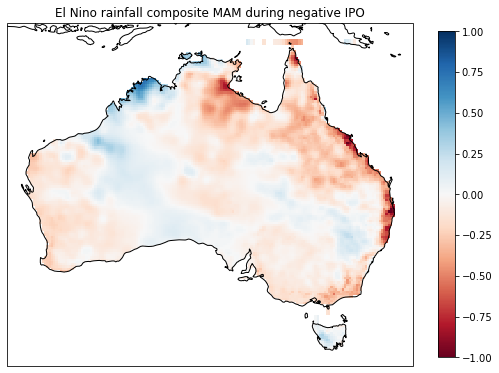

In [98]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_rra_autumn_t2.lon, nino_rra_autumn_t2.lat, nino_rra_autumn_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino rainfall composite MAM during negative IPO')

Text(0.5, 1.0, 'La Nina rainfall composite MAM during negative IPO')

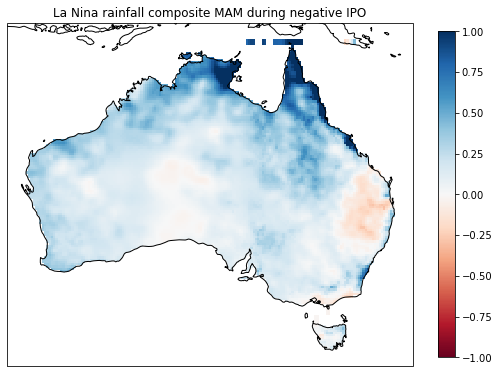

In [99]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_rra_autumn_t2.lon, nina_rra_autumn_t2.lat, nina_rra_autumn_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina rainfall composite MAM during negative IPO')

Text(0.5, 1.0, 'El Nino EP rainfall composite DJF during negative IPO')

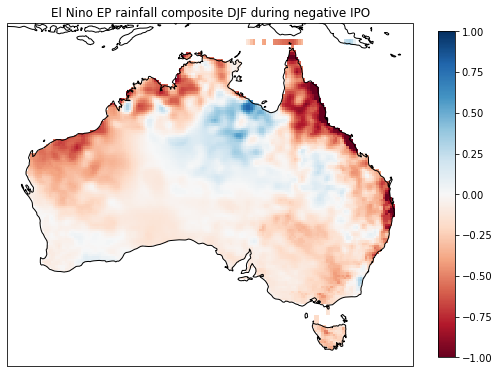

In [100]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_EP_rra_summer_t2.lon, nino_EP_rra_summer_t2.lat, nino_EP_rra_summer_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino EP rainfall composite DJF during negative IPO')

Text(0.5, 1.0, 'La Nina EP rainfall composite DJF during negative IPO')

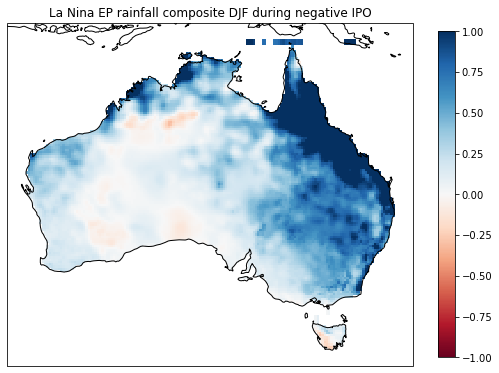

In [101]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_EP_rra_summer_t2.lon, nina_EP_rra_summer_t2.lat, nina_EP_rra_summer_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina EP rainfall composite DJF during negative IPO')

Text(0.5, 1.0, 'El Nino EP rainfall composite SON during negative IPO')

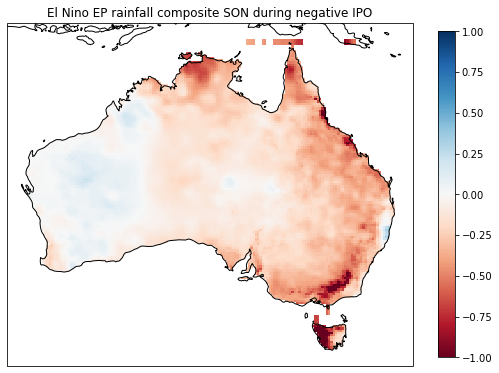

In [102]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_EP_rra_spring_t2.lon, nino_EP_rra_spring_t2.lat, nino_EP_rra_spring_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino EP rainfall composite SON during negative IPO')

Text(0.5, 1.0, 'La Nina EP rainfall composite SON during negative IPO')

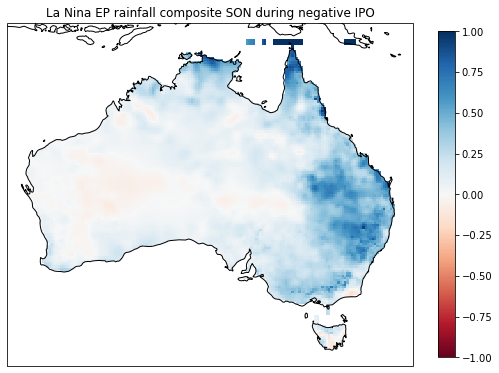

In [103]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_EP_rra_spring_t2.lon, nina_EP_rra_spring_t2.lat, nina_EP_rra_spring_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina EP rainfall composite SON during negative IPO')

Text(0.5, 1.0, 'El Nino EP rainfall composite MAM during negative IPO')

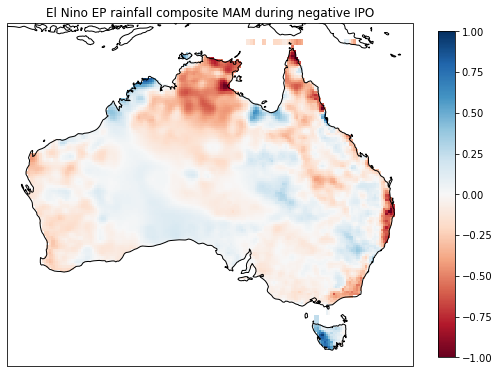

In [104]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_EP_rra_autumn_t2.lon, nino_EP_rra_autumn_t2.lat, nino_EP_rra_autumn_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino EP rainfall composite MAM during negative IPO')

Text(0.5, 1.0, 'La Nina EP rainfall composite MAM during negative IPO')

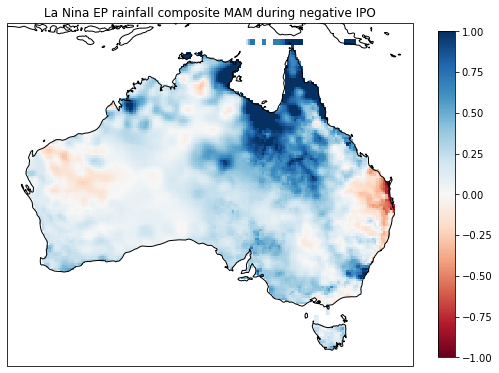

In [105]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_EP_rra_autumn_t2.lon, nina_EP_rra_autumn_t2.lat, nina_EP_rra_autumn_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina EP rainfall composite MAM during negative IPO')

Text(0.5, 1.0, 'El Nino CP rainfall composite DJF during negative IPO')

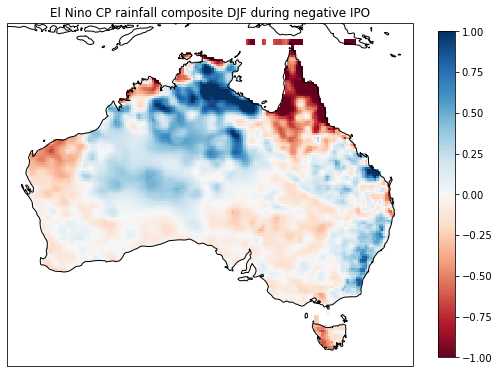

In [106]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_rra_summer_t2.lon, nino_CP_rra_summer_t2.lat, nino_CP_rra_summer_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino CP rainfall composite DJF during negative IPO')

Text(0.5, 1.0, 'La Nina CP rainfall composite DJF during negative IPO')

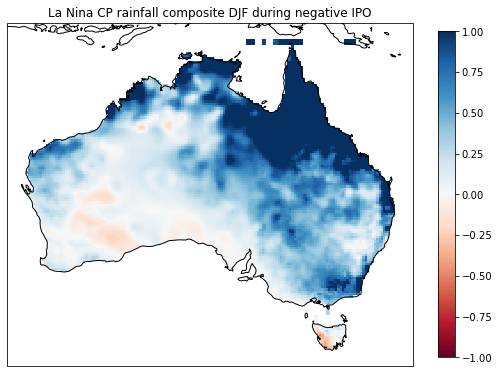

In [107]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_rra_summer_t2.lon, nina_CP_rra_summer_t2.lat, nina_CP_rra_summer_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina CP rainfall composite DJF during negative IPO')

Text(0.5, 1.0, 'El Nino CP rainfall composite SON during negative IPO')

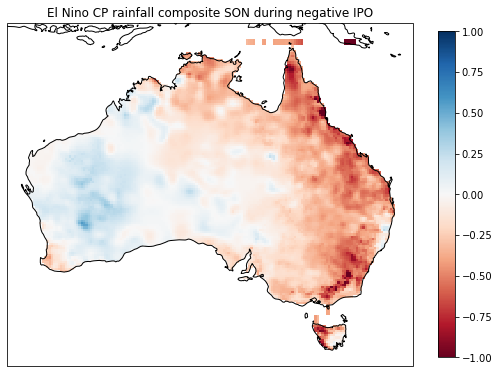

In [108]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_rra_spring_t2.lon, nino_CP_rra_spring_t2.lat, nino_CP_rra_spring_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino CP rainfall composite SON during negative IPO')

Text(0.5, 1.0, 'La Nina CP rainfall composite SON during negative IPO')

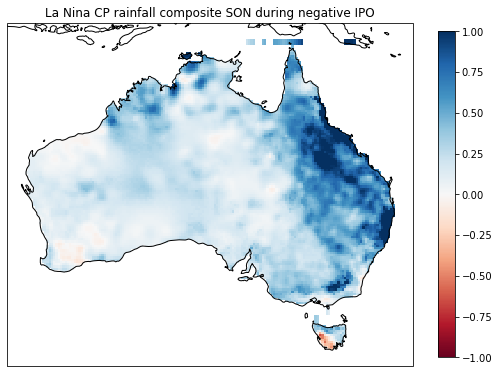

In [109]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_rra_spring_t2.lon, nina_CP_rra_spring_t2.lat, nina_CP_rra_spring_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina CP rainfall composite SON during negative IPO')

Text(0.5, 1.0, 'El Nino CP rainfall composite MAM during negative IPO')

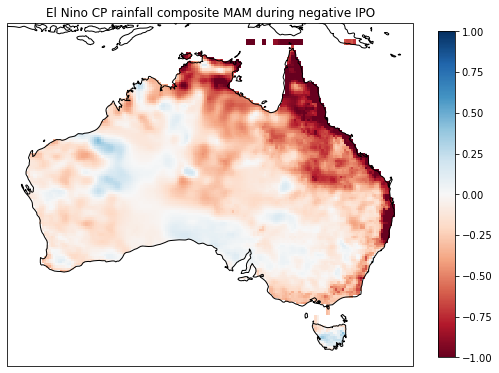

In [110]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nino_CP_rra_autumn_t2.lon, nino_CP_rra_autumn_t2.lat, nino_CP_rra_autumn_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('El Nino CP rainfall composite MAM during negative IPO')

Text(0.5, 1.0, 'La Nina CP rainfall composite MAM during negative IPO')

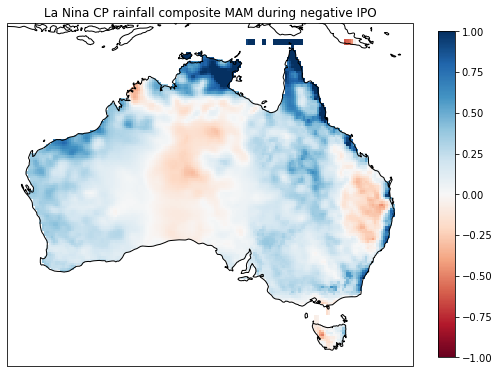

In [111]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
im = ax.pcolormesh(nina_CP_rra_autumn_t2.lon, nina_CP_rra_autumn_t2.lat, nina_CP_rra_autumn_t2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(-1.0, 1.0)
plt.colorbar(im, ax=ax, shrink=0.3)
ax.set_title('La Nina CP rainfall composite MAM during negative IPO')